In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/srinaren/Downloads/Single Genre Artists.csv')
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [20]:
# DATA EXPLORATION

In [11]:
df.shape

(95837, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [9]:
df.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [10]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [21]:
# DATA PREPROCESSING

In [14]:
df.select_dtypes(include='object').columns

Index(['id_songs', 'name_song', 'id_artists', 'release_date', 'genres',
       'name_artists'],
      dtype='object')

In [15]:
# Drop unnecessary ID and text columns
df.drop([
    'id_songs', 'name_song', 'id_artists',
    'release_date', 'genres', 'name_artists'
], axis=1, inplace=True)

In [17]:
df.head()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
0,0,161427,0,0.563,0.184,4,-13.757,1,0.0512,0.993,0.000016,0.325,0.654,133.088,3,5078.0,22
1,0,223440,0,0.427,0.180,10,-15.375,1,0.0670,0.989,0.000000,0.128,0.431,78.459,3,5078.0,22
2,0,208267,0,0.511,0.206,0,-15.514,1,0.0592,0.995,0.000000,0.418,0.481,70.443,4,5078.0,22
3,0,161933,0,0.676,0.467,9,-12.393,0,0.1650,0.991,0.000000,0.219,0.726,129.775,4,5078.0,22
4,0,167973,0,0.650,0.298,9,-13.806,1,0.1380,0.991,0.000000,0.373,0.844,75.950,4,5078.0,22


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   popularity_songs    95837 non-null  int64  
 1   duration_ms         95837 non-null  int64  
 2   explicit            95837 non-null  int64  
 3   danceability        95837 non-null  float64
 4   energy              95837 non-null  float64
 5   key                 95837 non-null  int64  
 6   loudness            95837 non-null  float64
 7   mode                95837 non-null  int64  
 8   speechiness         95837 non-null  float64
 9   acousticness        95837 non-null  float64
 10  instrumentalness    95837 non-null  float64
 11  liveness            95837 non-null  float64
 12  valence             95837 non-null  float64
 13  tempo               95837 non-null  float64
 14  time_signature      95837 non-null  int64  
 15  followers           95837 non-null  float64
 16  popu

In [19]:
# FEATURE SELECTION

In [22]:
features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms"
]

X = df[features]

In [23]:
# FEATURE NORMALIZATION

In [26]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(
    X_scaled,
    columns=features,
    index=X.index
)

In [27]:
df_scaled.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143


In [28]:
# K-MEANS CLUSTERING

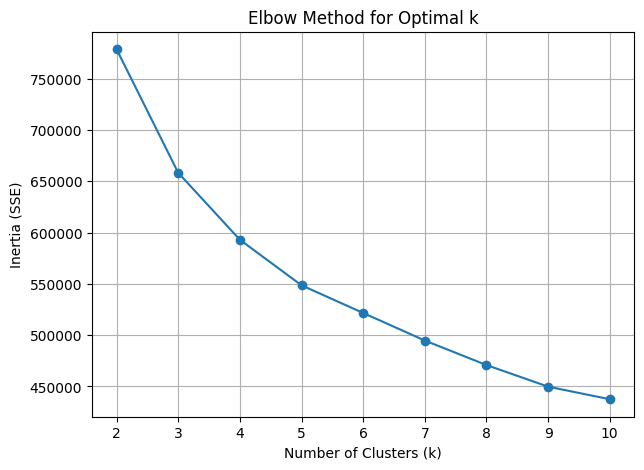

In [29]:
# Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [30]:
# Silhouette Score    
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.2032
k = 3, Silhouette Score = 0.2424
k = 4, Silhouette Score = 0.2311
k = 5, Silhouette Score = 0.1860
k = 6, Silhouette Score = 0.1865
k = 7, Silhouette Score = 0.1650
k = 8, Silhouette Score = 0.1721
k = 9, Silhouette Score = 0.1722
k = 10, Silhouette Score = 0.1593


In [31]:
# Silhouette Score    
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled,labels,sample_size=1000,random_state=42)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")


k = 2, Silhouette Score = 0.2086
k = 3, Silhouette Score = 0.2467
k = 4, Silhouette Score = 0.2336
k = 5, Silhouette Score = 0.2037
k = 6, Silhouette Score = 0.2084
k = 7, Silhouette Score = 0.1682
k = 8, Silhouette Score = 0.1744
k = 9, Silhouette Score = 0.1740
k = 10, Silhouette Score = 0.1567


In [34]:
# Choose optimal k
best_k = 3

In [35]:
# Fit final KMeans model
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(df_scaled)

In [48]:
# K-MEANS EVALUATION

In [47]:
print("Silhouette Score:",
      round(silhouette_score(df_scaled, df['cluster'], sample_size=1000, random_state=42), 4))

print("Inertia:",
      round(kmeans_final.inertia_, 2))

# Top 3 dominant features per cluster
for c in cluster_profile.index:
    print(f"\nCluster {c} - Top Features:")
    print(cluster_profile.loc[c].sort_values(ascending=False).head(3))

Silhouette Score: 0.2465
Inertia: 658335.08

Cluster 0 - Top Features:
duration_ms    97520.590
tempo            100.389
speechiness        0.830
Name: 0, dtype: float64

Cluster 1 - Top Features:
duration_ms     223457.064
tempo              111.940
acousticness         0.749
Name: 1, dtype: float64

Cluster 2 - Top Features:
duration_ms    226592.053
tempo             124.911
energy              0.694
Name: 2, dtype: float64


In [38]:
# Interpret Clusters
cluster_profile = df.groupby("cluster")[features].mean()
cluster_profile

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.664271,0.466636,-13.363885,0.829978,0.585932,0.001385,0.435535,0.584036,100.389473,97520.590026
1,0.486381,0.311231,-13.205013,0.060140,0.749228,0.168547,0.182070,0.413254,111.939598,223457.063979
2,0.627345,0.693655,-7.606487,0.075064,0.258485,0.050703,0.199867,0.666416,124.911397,226592.052516


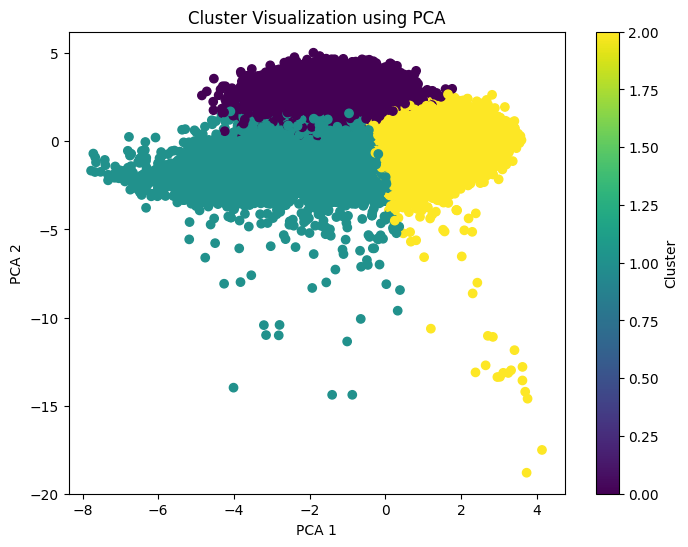

In [39]:
# PCA FOR VISUALIZATION
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Cluster Visualization using PCA")
plt.colorbar(label='Cluster')
plt.show()

In [49]:
# DBSCAN CLUSTERING

In [50]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=12)
df["db_cluster"] = dbscan.fit_predict(df_scaled)

# Basic info
print("Unique Clusters:", df["db_cluster"].unique())
print("Number of Clusters (excluding noise):",
      len(df[df["db_cluster"] != -1]["db_cluster"].unique()))

print("Noise Points:",
      (df["db_cluster"] == -1).sum())

Unique Clusters: [ 0 -1  1]
Number of Clusters (excluding noise): 2
Noise Points: 716


In [58]:
noise_percent = (df["db_cluster"] == -1).sum() / len(df) * 100
print("Noise %:", round(noise_percent, 2))

Noise %: 0.75


In [ ]:
# Cluster Evaluation

In [51]:
# Remove noise for evaluation
mask = df["db_cluster"] != -1

if df[mask]["db_cluster"].nunique() > 1:
    
    sil_db = silhouette_score(df_scaled[mask],
                              df["db_cluster"][mask])
    
    dbi_db = davies_bouldin_score(df_scaled[mask],
                                  df["db_cluster"][mask])
    
    print("DBSCAN Silhouette Score:", round(sil_db, 4))
    print("DBSCAN Davies-Bouldin Index:", round(dbi_db, 4))

DBSCAN Silhouette Score: 0.6992
DBSCAN Davies-Bouldin Index: 0.3189


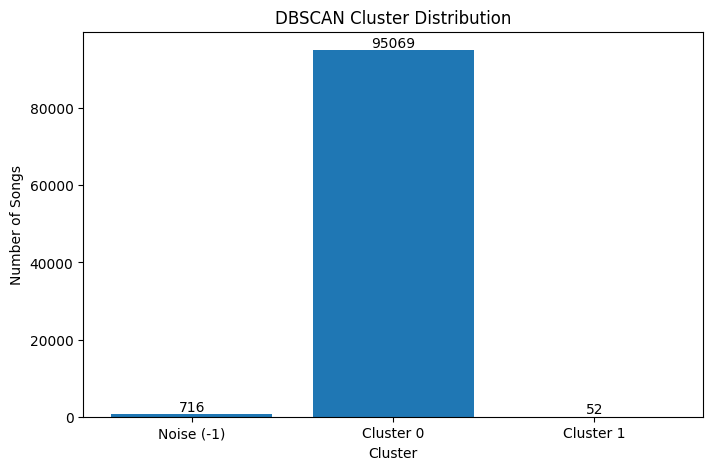

In [62]:
unique_labels, counts = np.unique(df["db_cluster"], return_counts=True)

label_names = [
    "Noise (-1)" if label == -1 else f"Cluster {label}"
    for label in unique_labels
]

plt.figure(figsize=(8,5))
plt.bar(label_names, counts)

plt.title("DBSCAN Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [52]:
#Cluster Interpretation
cluster_profile_db = df[mask].groupby("db_cluster")[features].mean().round(3)
print(cluster_profile_db)

            danceability  energy  loudness  speechiness  acousticness  \
db_cluster                                                              
0                  0.588   0.542   -10.105        0.168         0.458   
1                  0.582   0.323   -20.339        0.924         0.925   

            instrumentalness  liveness  valence    tempo  duration_ms  
db_cluster                                                             
0                      0.080     0.223    0.576  117.657   204342.722  
1                      0.001     0.791    0.432   87.140  1647144.712  


In [ ]:
# HIERARCHICAL CLUSTERING

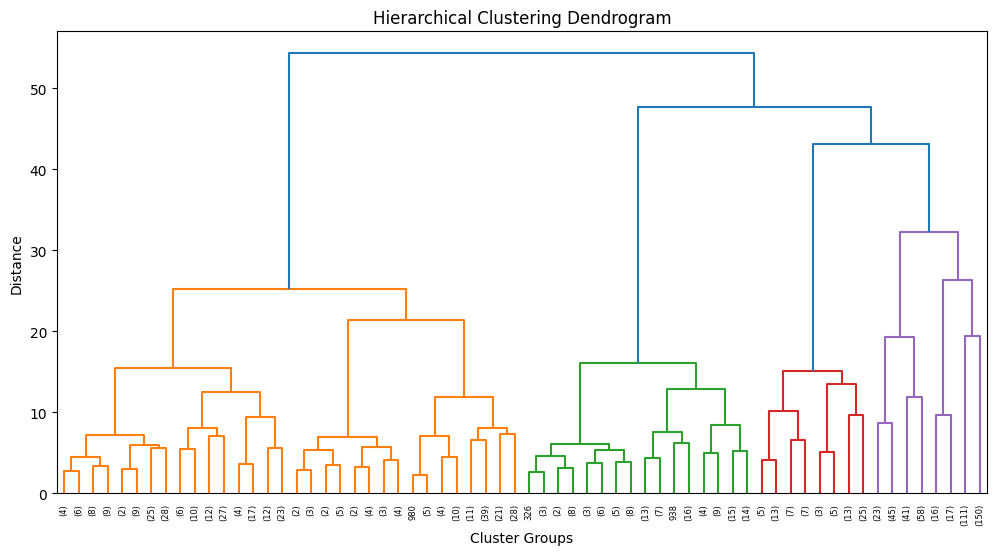

In [69]:
# Sample 1000 points for dendrogram
X_sample_hier = X_scaled[np.random.choice(len(X_scaled), 1000, replace=False)]

# Create linkage matrix (Ward method)
linked = linkage(X_sample_hier, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Groups")
plt.ylabel("Distance")
plt.show()

In [73]:
# CLUSTERING ALGORITHM COMPARISON

In [72]:
results = []

# KMeans
results.append({
    "Algorithm": "KMeans",
    "Silhouette": silhouette_score(X_scaled, df['cluster'], sample_size=1000),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, df['cluster'])
})

# DBSCAN
mask = df['db_cluster'] != -1

if len(df['db_cluster'][mask].unique()) > 1:
    results.append({
        "Algorithm": "DBSCAN",
        "Silhouette": silhouette_score(X_scaled[mask], df['db_cluster'][mask]),
        "Davies-Bouldin": davies_bouldin_score(X_scaled[mask], df['db_cluster'][mask])
    })


# Hierarchical 
from scipy.cluster.hierarchy import linkage, fcluster

X_subset = X_scaled[:5000]  
Z = linkage(X_subset, method='ward')
hier_labels = fcluster(Z, 3, criterion='maxclust')

results.append({
    "Algorithm": "Hierarchical",
    "Silhouette": silhouette_score(X_subset, hier_labels),
    "Davies-Bouldin": davies_bouldin_score(X_subset, hier_labels)
})

# Final Comparison
comparison = pd.DataFrame(results)
comparison

,Algorithm,Silhouette,Davies-Bouldin
0,KMeans,0.253353,1.570216
1,DBSCAN,0.699230,0.318855
2,Hierarchical,0.274350,1.487665


In [ ]:
# EXPORT FINAL RESULTS

In [76]:
df.to_csv('amazon_music_final_clusters.csv', index=False)
print("Final dataset saved successfully!")

Final dataset saved successfully!


In [77]:
# BEST CLUSTERING ALGORITHM SELECTION

In [74]:
# Step 1: Rank based on Silhouette (Higher is better)
best_sil = comparison.loc[comparison['Silhouette'].idxmax()]

# Step 2: Rank based on Davies-Bouldin (Lower is better)
best_db = comparison.loc[comparison['Davies-Bouldin'].idxmin()]

print("Best by Silhouette:", best_sil['Algorithm'])
print("Best by Davies-Bouldin:", best_db['Algorithm'])

# Step 3: Final Decision
if best_sil['Algorithm'] == best_db['Algorithm']:
    print("\nFinal Best Model:", best_sil['Algorithm'])
else:
    print("\nMetrics disagree. Choose model with better balance manually.")

Best by Silhouette: DBSCAN
Best by Davies-Bouldin: DBSCAN

Final Best Model: DBSCAN


In [78]:
'''
Final Best Model: DBSCAN
Justification:
 ->Highest Silhouette Score: 0.699230 
 ->Lowest Davies-Bouldin Index: 0.318855
 ->Noise Handling: DBSCAN identified 0.75% of songs as outliers.
 '''

'\nFinal Best Model: DBSCAN\nJustification:\n ->Highest Silhouette Score: 0.699230 \n ->Lowest Davies-Bouldin Index: 0.318855\n ->Noise Handling: DBSCAN identified 0.75% of songs as outliers.\n '